In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
path = r'/Users/matthewabrams/Desktop/Stocks Data/'
stocks = pd.read_csv(os.path.join(path, 'Stock Datasets/New Files/6_Stocks_Transformed.csv'), index_col = False)
stocks.drop(columns =['Unnamed: 0', 'MA_Six_Months', 'MA_One_Year'], inplace = True)
stocks

,Date,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $
0,2014-09-22,Amazon,62189780,16.2250,16.4245,16.4745,16.4745
1,2014-09-23,Amazon,46972460,16.1815,16.1230,16.3800,16.3800
2,2014-09-24,Amazon,52802720,16.4105,16.2085,16.4720,16.4720
3,2014-09-25,Amazon,58573060,16.0965,16.3995,16.4270,16.4270
4,2014-09-26,Amazon,72707740,16.1605,16.0300,16.1750,16.1750
...,...,...,...,...,...,...,...
15097,2024-09-16,Tesla,54323000,226.7800,229.3000,229.9600,223.5300
15098,2024-09-17,Tesla,66761640,227.8700,229.4500,234.5700,226.5533
15099,2024-09-18,Tesla,78010200,227.2000,230.0900,235.6800,226.8800
15100,2024-09-19,Tesla,102694600,243.9200,234.0000,244.2400,232.1300


In [3]:
# Dropping columns of non-numerical value
stocks = stocks[['Volume', 'Close/Last in $', 'Open in $', 'High in $', 'Low in $']]
stocks

,Volume,Close/Last in $,Open in $,High in $,Low in $
0,62189780,16.2250,16.4245,16.4745,16.4745
1,46972460,16.1815,16.1230,16.3800,16.3800
2,52802720,16.4105,16.2085,16.4720,16.4720
3,58573060,16.0965,16.3995,16.4270,16.4270
4,72707740,16.1605,16.0300,16.1750,16.1750
...,...,...,...,...,...
15097,54323000,226.7800,229.3000,229.9600,223.5300
15098,66761640,227.8700,229.4500,234.5700,226.5533
15099,78010200,227.2000,230.0900,235.6800,226.8800
15100,102694600,243.9200,234.0000,244.2400,232.1300


In [4]:
clusters = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in clusters] # Defines k-means clusters in the range assigned above.

In [5]:
score = [kmeans[i].fit(stocks).score(stocks) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-6.055485625103044e+19,
 -2.389461522926372e+19,
 -1.1851819795774085e+19,
 -7.192733012863089e+18,
 -4.900147450307504e+18,
 -3.6300916767591977e+18,
 -2.7576362473155277e+18,
 -2.2232362407271135e+18,
 -1.7246940801697956e+18]

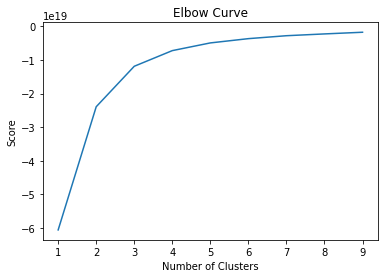

In [6]:
# Plot the elbow curve using PyLab.

pl.plot(clusters,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [7]:
# There's a jump from 3 to 4 on the x axis, but after that, the curve straightens out. 
# That means the optimal number of clusters should be 4

In [8]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1)

In [9]:
# Fit the k-means object to the data.

kmeans.fit(stocks)

/Users/matthewabrams/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [10]:
stocks['clusters'] = kmeans.fit_predict(stocks)

/Users/matthewabrams/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/var/folders/t8/xh28456s3kngn8qzvmt25b700000gn/T/ipykernel_53899/2159357975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks['clusters'] = kmeans.fit_predict(stocks)


In [11]:
stocks.head(20)

,Volume,Close/Last in $,Open in $,High in $,Low in $,clusters
0,62189780,16.2250,16.4245,16.4745,16.4745,0
1,46972460,16.1815,16.1230,16.3800,16.3800,2
2,52802720,16.4105,16.2085,16.4720,16.4720,0
3,58573060,16.0965,16.3995,16.4270,16.4270,0
4,72707740,16.1605,16.0300,16.1750,16.1750,0
5,38477780,16.0910,16.0250,16.1875,16.1875,2
6,52718740,16.1220,16.0680,16.1715,16.1715,0
7,61774240,15.8730,16.1020,16.1083,16.1083,0
8,71252360,15.9205,15.8460,15.9265,15.9265,0
9,60731540,16.1370,16.0180,16.2580,16.2580,0


In [12]:
stocks['clusters'].value_counts()

2    8166
0    4782
3    1788
1     366
Name: clusters, dtype: int64

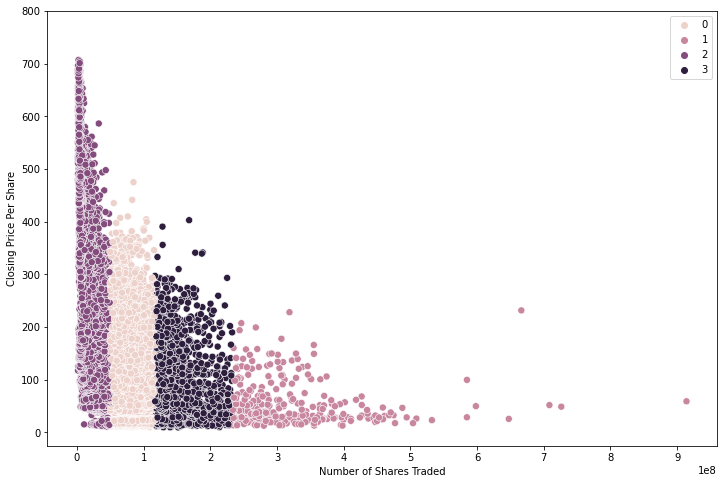

In [13]:
# Plot the clusters for the "Volume" and "Close/Last in $" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = stocks['Volume'] , y = stocks['Close/Last in $'], hue = kmeans.labels_, s = 50) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Shares Traded') # Label x-axis.
x_ticks = np.arange(0, 1000000000, 100000000)
y_ticks = np.arange(0, 900, 100)
plt.xticks(x_ticks, rotation = 0)
plt.ylabel('Closing Price Per Share') # Label y-axis.
plt.yticks(y_ticks, rotation = 0)
plt.show()

In [14]:
# The first cluster in pink (coded as 1) gathers more data points relating to dates with a higher closing price yet lower number of shares traded 
# The last cluster in purple (coded as 2) gathers more data points relating to dates with a lower closing price yet relative higher number of shares traded 
# The clusters show that gor Apple Stock, if volume of shares decrease, the closing price increases.

In [15]:
stocks.loc[stocks['clusters'] == 3, 'cluster'] = 'dark purple'
stocks.loc[stocks['clusters'] == 2, 'cluster'] = 'purple'
stocks.loc[stocks['clusters'] == 1, 'cluster'] = 'pink'
stocks.loc[stocks['clusters'] == 0, 'cluster'] = 'salmon colored'

In [16]:
stocks.groupby('cluster').agg({'Volume':['mean', 'median'], 
                         'Close/Last in $':['mean', 'median']})

Volume              Close/Last in $           
                        mean       median            mean     median
cluster                                                             
dark purple     1.557107e+08  147358778.0       82.033164   47.86125
pink            3.116404e+08  285684982.0       50.883202   32.17375
purple          2.112976e+07   19637350.0      223.047067  184.51500
salmon colored  7.791406e+07   75505135.0      107.587448   93.86625

In [17]:
# The average closing price per share received for the purple cluster group is over 220 dollars with the average volume of shares over 21 million shares
# The average closing price per share received for the pink cluster group is approximately 50 dollars with the average volume of shares over 300 million shares
# Supports hypothesis: If number of shares traded increases, the closing price decreases.